In [1]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
rc('text',
   usetex=True)
sns.set_style('ticks')
sns.set_style({'font.family':'sans-serif'})
flatui = ['#002A5E', '#FD151B', '#8EBA42', '#348ABD', '#988ED5', '#BDB76B', '#8EBA42', '#FFB5B8']
sns.set_palette(flatui)
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 10}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

# Plot Co-location Throughputs

In [2]:
import sys
sys.path.append("..")
import utils
all_throughputs = utils.read_all_throughputs("../../logs/colocation")

v100_2019-02-01.log
k80.log
p100.log
v100_1_22.log
v100.log
k80_reduced_minibatch_sizes.log


In [13]:
import itertools
def plot(all_throughputs, worker_type, models_to_plot=None,
         model_labels=None):
    cm = []
    true_cm = []
    cm_row = []
    true_cm_row = []

    individual_model_throughputs = {}
    for models in all_throughputs:
        if worker_type not in all_throughputs[models]:
            continue
        throughputs = all_throughputs[models][worker_type]
        models = list(models)
        if len(models) == 1:
            individual_model_throughputs[models[0]] = throughputs[0]

    if models_to_plot is not None:
        models = models_to_plot
    else:
        models = list(individual_model_throughputs.keys())
    models.sort()
    n = len(models)
    m = len(models)
    for (model1, model2) in itertools.product(models, repeat=2):
        if model1 is None:
            if model2 is None:
                normalized_throughputs = 0.0
            else:
                normalized_throughputs = 1.0
        elif model2 is None:
            normalized_throughputs = 1.0
        else:
            model_combination1 = (model1, model2)
            model_combination2 = (model2, model1)
            if model_combination1 in all_throughputs and worker_type in all_throughputs[model_combination1]:
                (throughput1, throughput2) = \
                    all_throughputs[model_combination1][worker_type]
            elif model_combination2 in all_throughputs and worker_type in all_throughputs[model_combination2]:
                (throughput2, throughput1) = \
                    all_throughputs[model_combination2][worker_type]
            else:
                (throughput1, throughput2) = (0.0, 0.0)
            normalized_throughputs = (throughput1 / individual_model_throughputs[model1]) + \
                (throughput2 / individual_model_throughputs[model2])
        true_cm_row.append(normalized_throughputs)
        if normalized_throughputs < 1.3:
            normalized_throughputs = 1.0
        elif normalized_throughputs > 1.6:
            normalized_throughputs = 2.0
        else:
            normalized_throughputs = 1.5
        cm_row.append(normalized_throughputs)
        if len(cm_row) == m:
            true_cm.append(true_cm_row)
            cm.append(cm_row)
            true_cm_row = []
            cm_row = []
    true_cm = np.array(true_cm)
    cm = np.array(cm)

    print(true_cm)
    print(cm)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    vmin = 0.9
    vmax = 2.1
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.RdYlGn,
              vmin=0.9, vmax=2.1)
    tick_marks = np.arange(n)
    models = [model.replace("_", "\_") if model is not None else "None"
              for model in models]

    ax.minorticks_on()
    from matplotlib.ticker import FixedLocator
    minor_locator = FixedLocator([x+0.5 for x in tick_marks])
    ax.set_xticks(tick_marks)
    
    if model_labels is not None:
        ax.set_xticklabels([model_labels[model] for model in models],
                           rotation=45)
    else:
        ax.set_xticklabels(models, rotation=45)
    ax.set_yticks(tick_marks)
    if model_labels is not None:
        ax.set_yticklabels([model_labels[model] for model in models])
    else:
        ax.set_yticklabels(models)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.yaxis.set_minor_locator(minor_locator)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        thresh = (vmin + vmax) / 2.
        plt.text(j, i, format(true_cm[i, j], '.2f') if cm[i, j] > 0 else "",
                 horizontalalignment="center",
                 color="white" if (cm[i, j] > thresh) else "black")

    ax.grid(which='minor', axis='both', linestyle='-', color='k', linewidth=3)
    plt.show()

[[2.58580183 2.19309892 2.22128219 1.96086597 2.26586897 2.23721494
  1.88722892 2.06090306 1.76698341]
 [2.19309892 1.07307451 1.29696202 1.31223156 1.49747131 1.45345775
  1.11097787 1.38481245 1.07638255]
 [2.22128219 1.29696202 1.28222013 1.40310577 1.61403873 1.68620495
  1.23071929 1.47104092 1.23925127]
 [1.96086597 1.31223156 1.40513214 1.55634723 1.76132812 1.79325689
  1.31523915 1.60310429 1.22088379]
 [2.26586897 1.49747131 1.61403873 1.77261443 1.93739213 1.85016978
  1.41553296 1.86584589 1.2743593 ]
 [2.23721494 1.45345775 1.68620495 1.79325689 1.85016978 1.78067318
  1.49680222 1.84218579 1.2864374 ]
 [1.88722892 1.11097787 1.23071929 1.31523915 1.41553296 1.49680222
  1.02518519 1.33394925 1.06922676]
 [2.06090306 1.38481245 1.47104092 1.60310429 1.86584589 1.84218579
  1.33394925 1.64288243 1.21803791]
 [1.76698341 1.07638255 1.23925127 1.22088379 1.2743593  1.2864374
  1.06922676 1.21803791 0.90659898]]
[[2.  2.  2.  2.  2.  2.  2.  2.  2. ]
 [2.  1.  1.  1.5 1.5 1.5

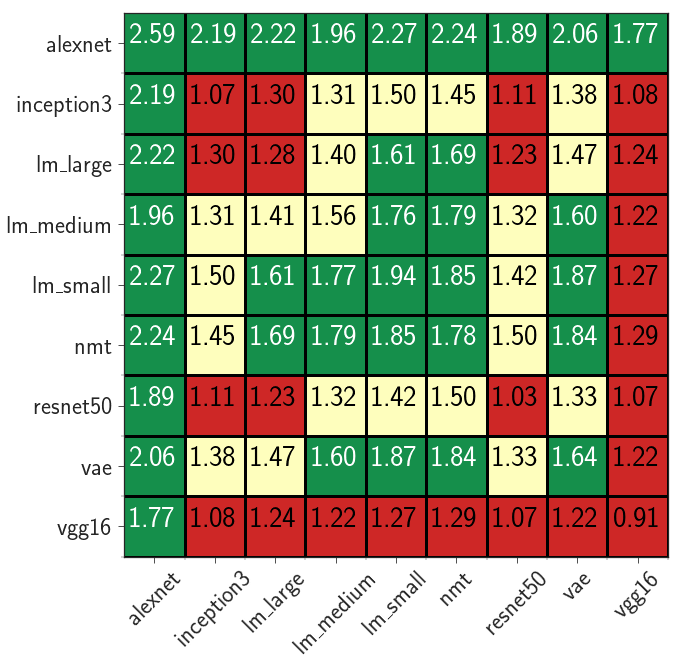

In [14]:
plot(all_throughputs, "v100")

[[1.44600443 1.45808702 1.6142666  1.64946667 1.52579441 1.62597732
  1.52436025]
 [1.45808702 0.93661294 1.21286304 1.51763309 0.98907899 1.41106832
  1.35708209]
 [1.6142666  1.21286304 1.29387826 1.80716338 1.23110652 1.50079994
  1.50574275]
 [1.64946667 1.51763309 1.80716338 1.83510638 1.60148146 1.87442915
  2.01856944]
 [1.52579441 0.98907899 1.23110652 1.60148146 1.04350935 1.40964806
  1.35938846]
 [1.62597732 1.41106832 1.50079994 1.87442915 1.40964806 1.61489027
  1.71013164]
 [1.52436025 1.35708209 1.50574275 2.01856944 1.35938846 1.71013164
  1.68079168]]
[[1.5 1.5 2.  2.  1.5 2.  1.5]
 [1.5 1.  1.  1.5 1.  1.5 1.5]
 [2.  1.  1.  2.  1.  1.5 1.5]
 [2.  1.5 2.  2.  2.  2.  2. ]
 [1.5 1.  1.  2.  1.  1.5 1.5]
 [2.  1.5 1.5 2.  1.5 2.  2. ]
 [1.5 1.5 1.5 2.  1.5 2.  2. ]]


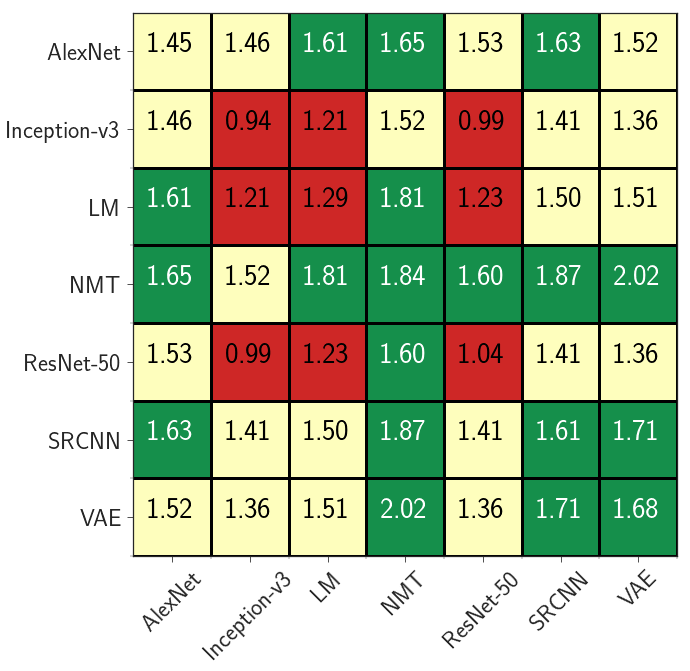

In [15]:
plot(all_throughputs, "v100_1_22",
     models_to_plot=["alexnet_64", "inception3_64", "lm_large", "nmt_64", "resnet50_64", "srcnn", "vae"],
     model_labels={"alexnet\_64": "AlexNet", "inception3\_64": "Inception-v3", "lm\_large": "LM",
                   "nmt\_64": "NMT", "resnet50\_64": "ResNet-50", "srcnn": "SRCNN", "vae": "VAE"})

[[2.  2.  2.  2.  2.  2.  2.  2.  1.5]
 [2.  1.  1.  1.  1.  1.5 1.  1.5 1. ]
 [2.  1.  1.  1.  1.5 2.  1.  1.5 1. ]
 [2.  1.  1.  1.5 1.5 2.  1.  1.5 1. ]
 [2.  1.  1.5 1.5 2.  2.  1.5 2.  1. ]
 [2.  1.5 2.  2.  2.  2.  1.5 2.  1. ]
 [2.  1.  1.  1.  1.5 1.5 1.  1.  1. ]
 [2.  1.5 1.5 1.5 2.  2.  1.  1.5 1. ]
 [1.5 1.  1.  1.  1.  1.  1.  1.  1. ]]


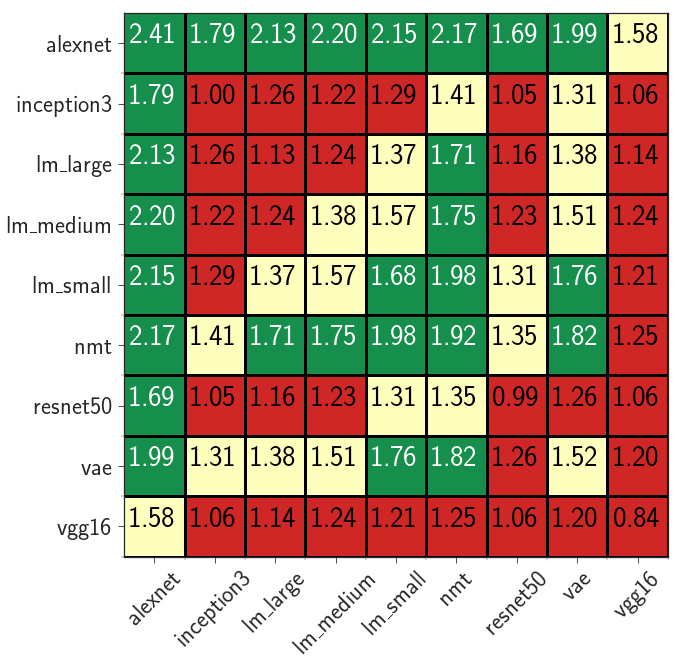

In [12]:
plot(all_throughputs, "p100")